About Author

Author: Rayan Alomari

Project Title: Bank Customer Exit Modeling

Data
The dataset consists of various features related to bank customers, including demographic
information, financial transactions, and account activity. The key attributes include:
1. Row Number: Index of the customer in the dataset.

2. Customer ID: Unique identifier for each customer.

3. Surname: Customer’s last name.

4. Credit Score: Creditworthiness score of the customer.

5. Geography: Country where the customer is located.

6. Gender: Male or Female.

7. Age: Customer's age.

8. Tenure: Number of years the customer has been with the bank.

9. Balance: Customer's bank account balance.

10. Number of Products: Number of financial products the customer holds.

11. Has Credit Card: Whether the customer has a credit card (1 = Yes, 0 = No).

12. Is Active Member: Whether the customer is an active user (1 = Yes, 0 = No).

13. Estimated Salary: The customer's estimated income.

14. Exited: The target variable (1 if the customer exited, 0 otherwise).


Metadata
Dataset Source: Kaggle - Bank Customer Churn[link text](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

Data Loading and Exploration | Cleaning



In [1]:
# Read the dataset
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Bank_Churn_Modelling12.csv')
uncleaned=data.copy()
data.sample(18)

Saving Bank_Churn_Modelling12.csv to Bank_Churn_Modelling12.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8336,8337,15788480,Pagnotto,786,Germany,Female,33.0,0,122325.58,1,0.0,0.0,34712.34,1
7236,7237,15651460,Hsieh,424,Spain,Male,34.0,7,0.00,1,1.0,1.0,16250.61,0
694,695,15681068,Chinagorom,796,France,Female,45.0,2,109730.22,1,1.0,1.0,123882.73,0
8740,8741,15570908,Harding,687,Spain,Female,29.0,7,93617.07,1,0.0,1.0,113050.92,0
1725,1726,15574879,Wright,631,Germany,Female,37.0,2,121801.72,2,0.0,1.0,23146.62,0
9423,9424,15757385,Milne,578,Spain,Female,28.0,8,161592.76,1,1.0,0.0,177834.79,0
9931,9932,15647800,Greco,850,France,Female,34.0,6,101266.51,1,1.0,0.0,33501.98,0
5735,5736,15756070,Greenwood,585,Spain,Female,44.0,4,0.00,2,0.0,1.0,101728.46,0
8705,8706,15804064,Docherty,742,France,Female,35.0,2,79126.17,1,1.0,1.0,126997.53,0
519,520,15745417,Knipe,707,France,Male,58.0,6,89685.92,1,0.0,1.0,126471.13,0


Let's see the column names.

In [2]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Let's take a look at the structure of the dataset.

In [3]:
data.shape

(10002, 14)

Let's examine the columns and their respective data types by using the detailed info function.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


Handling Missing and Duplicate Values

In [5]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9997,False
9998,False
9999,True
10000,False


In [6]:
data=data.drop_duplicates()

In [7]:
# Missing values check
data.isnull().sum()  # Count of missing values in each column

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
from sklearn.impute import SimpleImputer

# Impute missing values by replacing them with the mean for the specified numeric columns
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'most_frequent' or 'constant' if needed
data[['Age']] = imputer.fit_transform(data[['Age']])
data['Geography'] = data['Geography'].fillna(data['Geography'].mode()[0])
data['IsActiveMember'] = data['IsActiveMember'].fillna(data[ 'IsActiveMember'].mode()[0])
data['HasCrCard'] = data['HasCrCard'].fillna(data[ 'HasCrCard'].mode()[0])

In [9]:
# Missing values check
data.isnull().sum()  # Count of missing values in each column

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Customer Churn Distribution

In [10]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


Data Cleaning and Preparation

In [11]:

data=data.drop(['RowNumber','CustomerId','Surname'], axis=1)


Geographical Distribution of Customers (Percentage)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

geo_distribution = data['Geography'].value_counts(normalize=True) * 100
print(geo_distribution)


Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


Exploratory Data Analysis (EDA)

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 Relationship between Credit Score and Customer Exit.

 Customers with lower credit scores were more likely to exit.


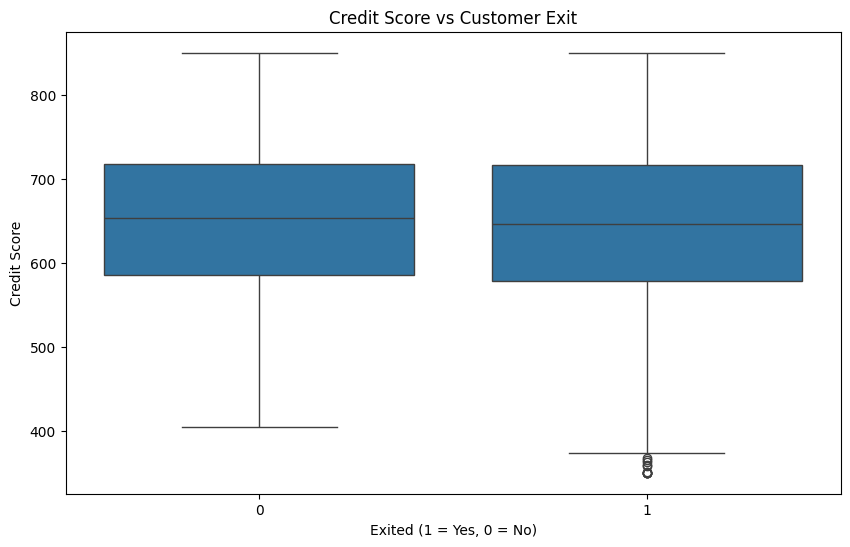

In [14]:
# 1. Relationship between Credit Score and Customer Exit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=data)  # Changed df to data
plt.title('Credit Score vs Customer Exit')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Credit Score')
plt.show()

Churn Rates by Geography .

Germany had the highest churn rate (32.44%), followed by Spain (16.67%) and France
(16.15%).


Churn Rates by Geography:
Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


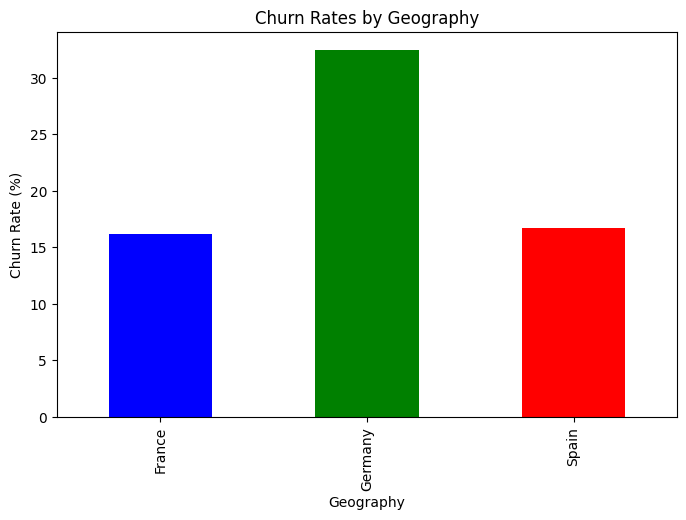

In [15]:
# 2. How Geography Influences Churn Rates
geo_churn = data.groupby('Geography')['Exited'].mean() * 100  # Changed df to data
print("Churn Rates by Geography:")
print(geo_churn)

plt.figure(figsize=(8, 5))
geo_churn.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Churn Rates by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')
plt.show()


 Correlation between Number of Products and Churn.

 Customers with only one product had a higher churn rate (27.71%), while those with four
products had a 100% churn rate.


Churn Rates by Number of Products:
NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64


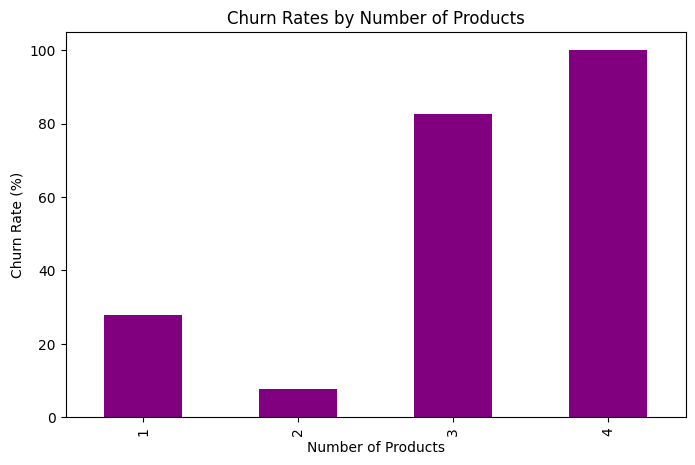

In [16]:
# 3. Correlation between Number of Products and Churn
num_products_churn = data.groupby('NumOfProducts')['Exited'].mean() * 100  # Changed df to data
print("Churn Rates by Number of Products:")
print(num_products_churn)

plt.figure(figsize=(8, 5))
num_products_churn.plot(kind='bar', color='purple')
plt.title('Churn Rates by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (%)')
plt.show()

Impact of Having a Credit Card on Customer Retention.

Customers without credit cards were slightly more likely to exit.

Churn Rates by Credit Card Ownership:
HasCrCard
0.0    20.814941
1.0    20.184266
Name: Exited, dtype: float64


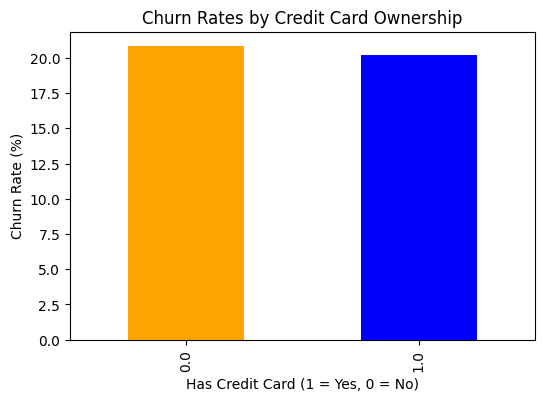

In [17]:
# 4. Impact of Having a Credit Card on Customer Retention
credit_card_churn = data.groupby('HasCrCard')['Exited'].mean() * 100  # Changed df to data
print("Churn Rates by Credit Card Ownership:")
print(credit_card_churn)

plt.figure(figsize=(6, 4))
credit_card_churn.plot(kind='bar', color=['orange', 'blue'])
plt.title('Churn Rates by Credit Card Ownership')
plt.xlabel('Has Credit Card (1 = Yes, 0 = No)')
plt.ylabel('Churn Rate (%)')
plt.show()

Age vs Customer Exit .

Older customers (above 50) were more likely to exit compared to younger customers.



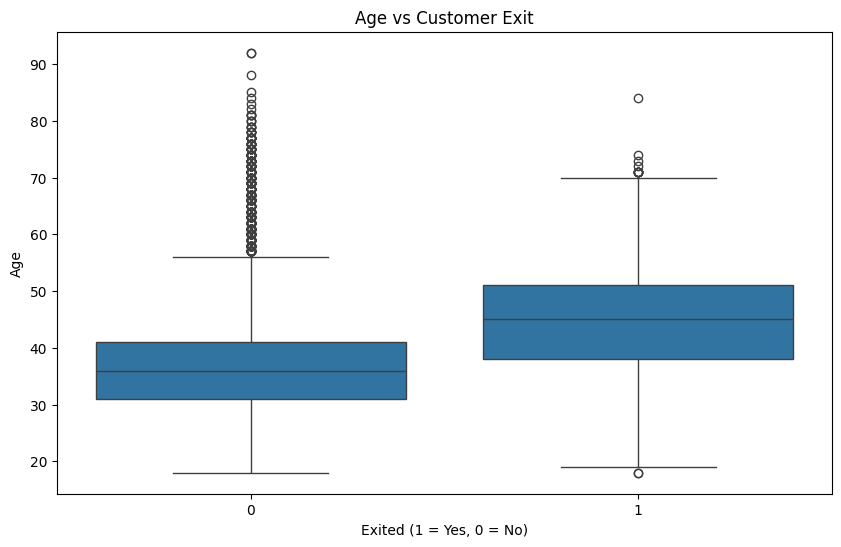

In [18]:
# 5. How Age Impacts Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=data)  # Changed df to data
plt.title('Age vs Customer Exit')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()


Relationship between Balance and Churn.

Customers with lower balances were more likely to exit.



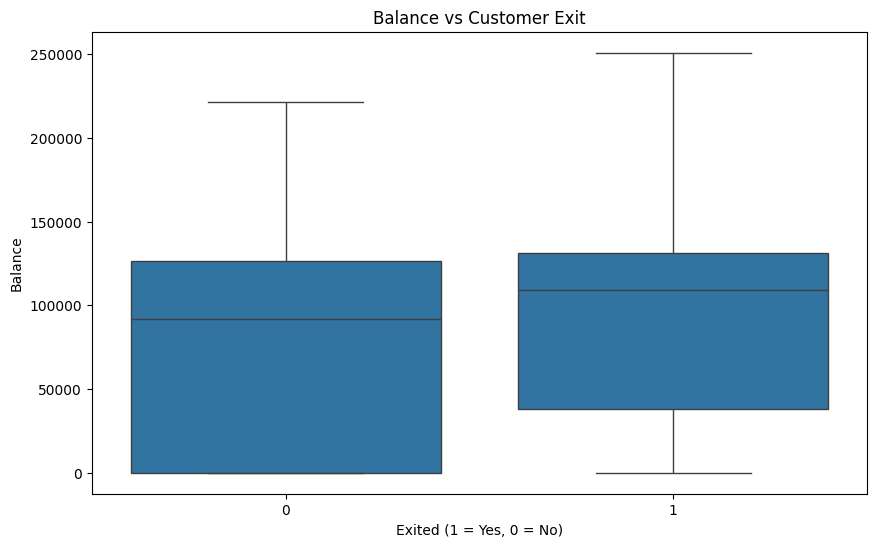

In [19]:
# 6. Relationship between Balance and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=data)  # Changed df to data
plt.title('Balance vs Customer Exit')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Balance')
plt.show()

 How Tenure Affects Churn.

Customers with shorter tenures were more likely to exit.



Churn Rates by Tenure:
Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.646341
10    20.612245
Name: Exited, dtype: float64


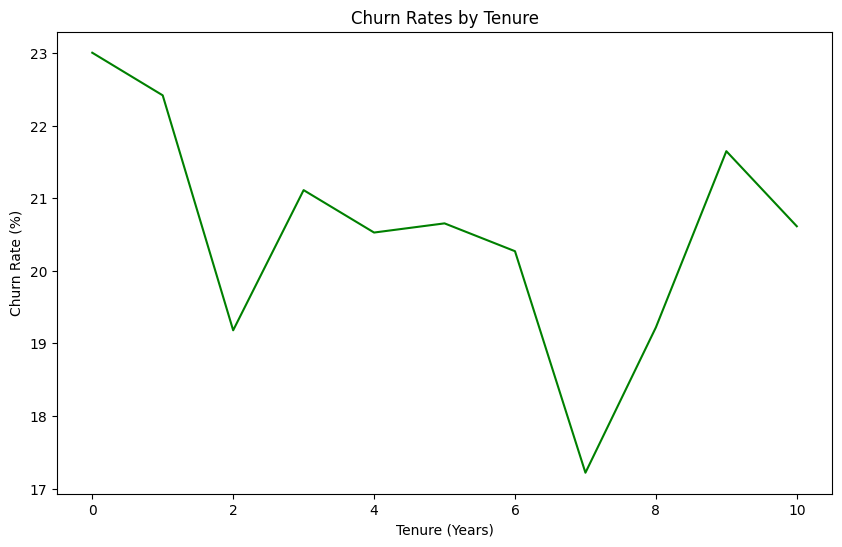

In [20]:
# 7. How Tenure Affects Churn
tenure_churn = data.groupby('Tenure')['Exited'].mean() * 100  # Changed df to data
print("Churn Rates by Tenure:")
print(tenure_churn)

plt.figure(figsize=(10, 6))
tenure_churn.plot(kind='line', color='green')
plt.title('Churn Rates by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate (%)')
plt.show()

Relationship between Estimated Salary and Churn.

Customers with lower estimated salaries were more likely to exit.


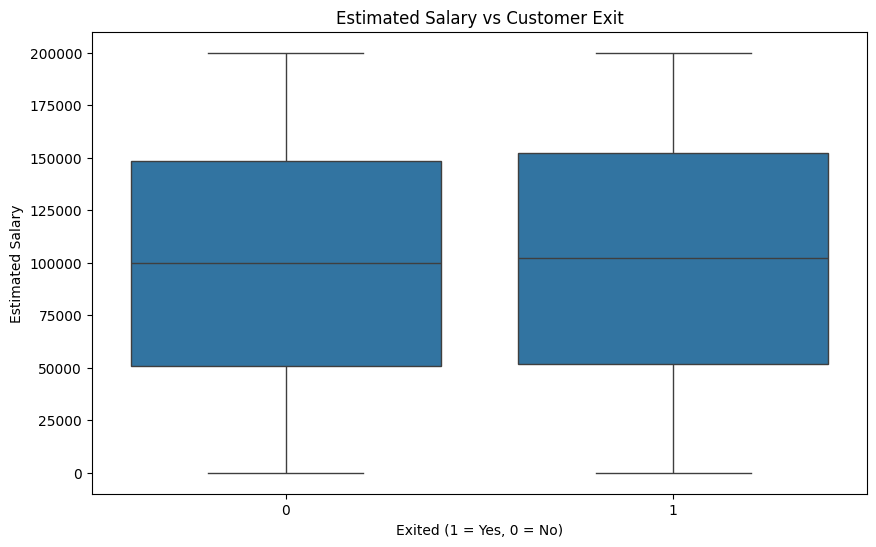

In [21]:

# 8. Relationship between Estimated Salary and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)  # Changed df to data
plt.title('Estimated Salary vs Customer Exit')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Estimated Salary')
plt.show()

Label Encoding of Categorical Features.

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le_geo = LabelEncoder()
le_gender = LabelEncoder()

data['Geography'] = le_geo.fit_transform(data['Geography'])
data['Gender'] = le_gender.fit_transform(data['Gender'])

In [23]:
data.head(9)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,822,0,1,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,376,1,0,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,501,0,1,44.0,4,142051.07,2,0.0,1.0,74940.50,0


Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

In [24]:
# Descriptive statistics
data.describe()  # Summary statistics for numerical columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.923095,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487110,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Correlation Matrix of Customer Attributes and Churn.

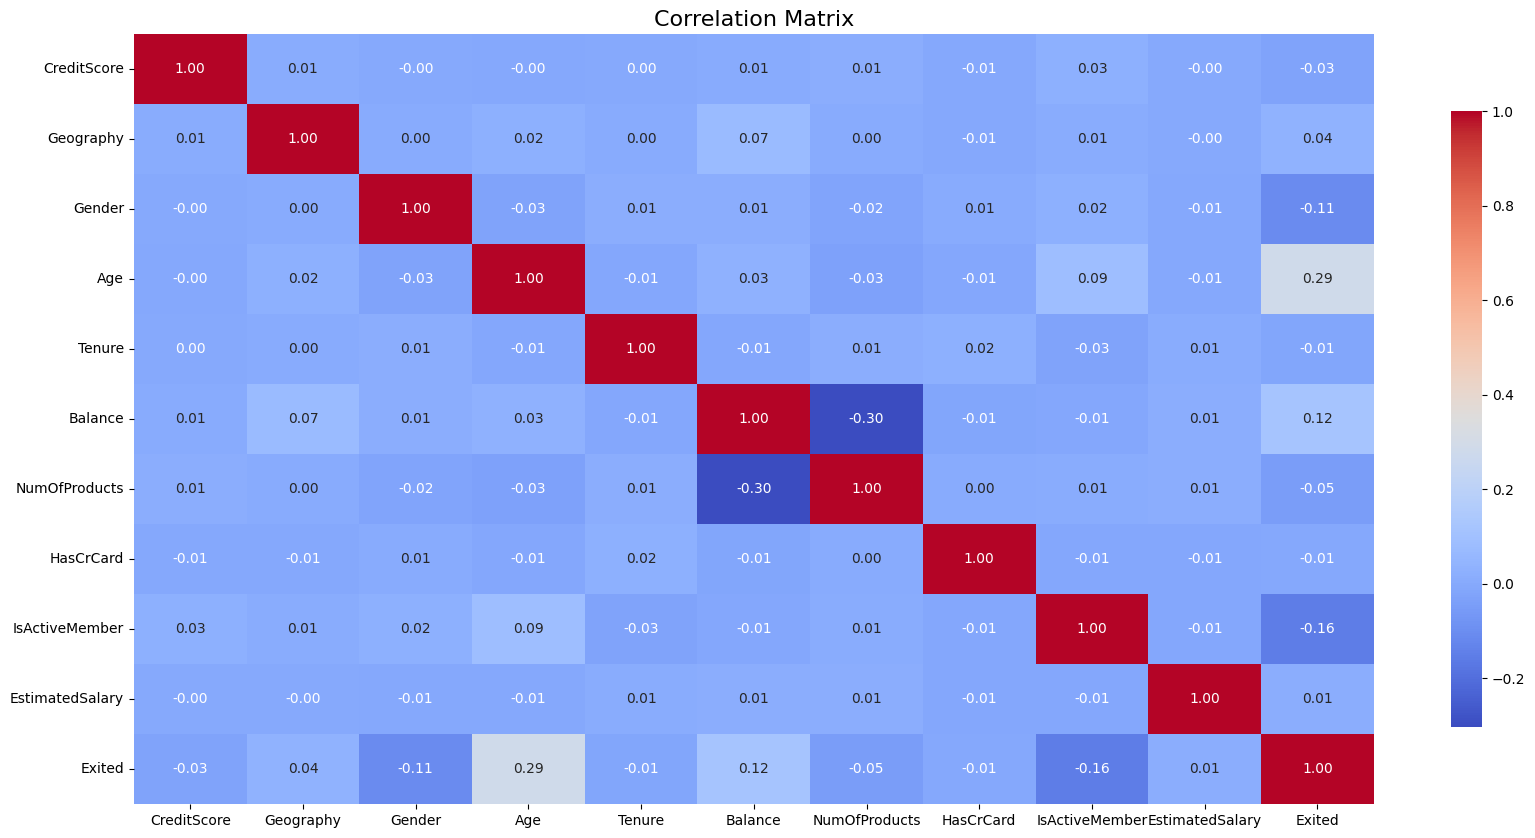

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data [['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Correlation Matrix", fontsize=16)

plt.show()


Churn Rate Analysis by Geography, Gender, Activity Status, and Number of Products.

In [26]:
import pandas as pd

# List of columns for which we want to calculate churn rate
columns_to_check = ['Geography', 'Gender', 'IsActiveMember', 'NumOfProducts']

# Dictionary to store the results
churn_rates = {}

# Calculate the churn rate for each unique value in each column
for col in columns_to_check:
    churn_rates[col] = data.groupby(col)['Exited'].mean() * 100  # Convert to percentage

# Convert the results into a DataFrame
churn_rates_df = pd.DataFrame(churn_rates)

# Display the results
print(churn_rates_df)


     Geography     Gender  IsActiveMember  NumOfProducts
0.0  16.154767  25.071539       26.850897            NaN
1.0  32.443204  16.455928       14.269074      27.714398
2.0  16.673395        NaN             NaN       7.581699
3.0        NaN        NaN             NaN      82.706767
4.0        NaN        NaN             NaN     100.000000


Data Preprocessing:

The code assumes that data is a pre-existing pandas DataFrame containing the dataset, including the Exited column, which denotes whether a customer has churned (1) or not (0).
It's important to ensure that Geography is either encoded as numerical values ( using one-hot encoding) or converted appropriately for PCA since PCA requires numerical input.
PCA Explanation:

You are selecting a set of numerical features (['CreditScore', 'Age', 'Balance', 'HasCrCard', 'Geography']) for PCA. It's crucial to ensure that all these features are numeric. If Geography is a categorical variable, it should be preprocessed ( one-hot encoding).
The PCA is reducing the dimensionality to 2 components for easier visualization.
Plotting:

The sns.scatterplot creates a scatter plot with points colored by the Exited column, making it easier to visualize how the customers who churn (Exited = 1) and those who stayed (Exited = 0) are distributed in the 2D space formed by the principal components.
The color palette coolwarm is a good choice for highlighting the distinction between churned and non-churned customers.
Potential Improvements:

You may want to check if the number of components chosen for PCA (2 in this case) explains a significant portion of the variance in the data. You can print pca.explained_variance_ratio_ to see the proportion of variance explained by each principal component.

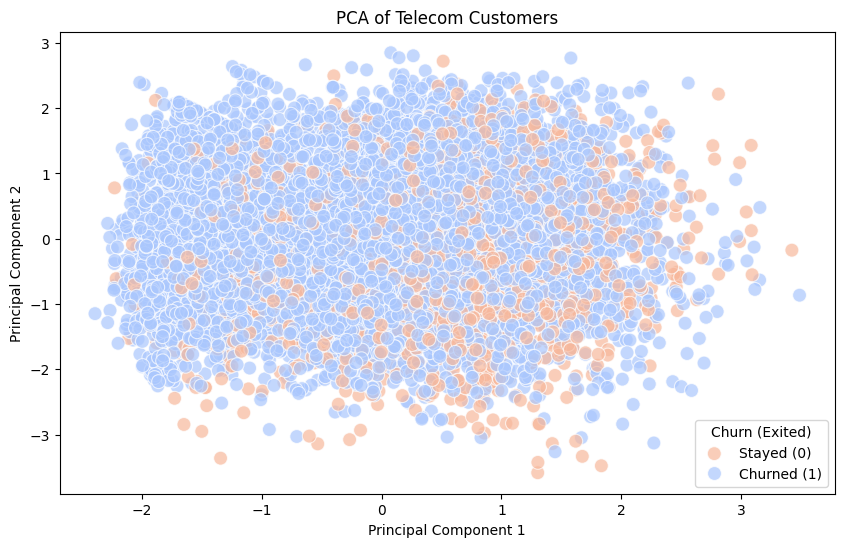

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Selecting numerical features for PCA
numeric_features = ['CreditScore', 'Age', 'Balance', 'HasCrCard', 'Geography']

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numeric_features])

# Applying PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Exited'] = data['Exited'].values  # Ensure Exited column is correctly assigned

# Plotting PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Exited'], palette='coolwarm', s=100, alpha=0.7)
plt.title("PCA of Telecom Customers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Churn (Exited)", labels=["Stayed (0)", "Churned (1)"])
plt.show()


1. Normalization and PCA:

Standardization: The StandardScaler is applied to normalize the data, ensuring that features like 'Geography' and 'HasCrCard' (which may have different units or ranges) are on the same scale for fair clustering.
PCA: Principal Component Analysis (PCA) is used to reduce the dimensions of the data to 2 components, which allows visualization and analysis of the clusters in 2D.

2. Elbow Method:
The Elbow Method is used to determine the optimal number of clusters (K) for KMeans by plotting the inertia (sum of squared distances to the centroids) against the number of clusters.
The "elbow" point in the plot indicates the best number of clusters to choose, where increasing the number of clusters does not significantly reduce the inertia.

3. Clustering with KMeans:
After identifying the optimal number of clusters (K=4, in this case), the KMeans algorithm is applied, and cluster labels are assigned to each data point (customer).

4. Clustering Evaluation:
Silhouette Score: The Silhouette Score is computed to assess the quality of the clustering. A score closer to +1 indicates that clusters are well-separated, while a score closer to 0 indicates overlapping clusters.

5. Cluster Distribution Visualization:
A count plot shows how many customers are in each cluster. This provides insight into the balance of clusters.

6. Churn Rate Analysis:
The Churn Rate for each cluster is calculated by averaging the 'Exited' column (1 for churned customers, 0 for non-churned customers) within each cluster. This helps understand the churn behavior within different clusters.
Potential Improvements & Considerations:
Feature Engineering: If the feature 'Geography' is categorical, it might need to be encoded into numerical values ( using one-hot encoding) before scaling, as PCA and KMeans require numeric data.


KMeans Parameters: You can try different settings for n_init (number of initializations of KMeans) or use the random_state parameter for reproducibility. Also, fine-tune the max_iter to ensure convergence.


Churn Insights: After obtaining the churn rates by cluster, you can look into the characteristics of customers in each cluster to understand what factors drive higher churn rates.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


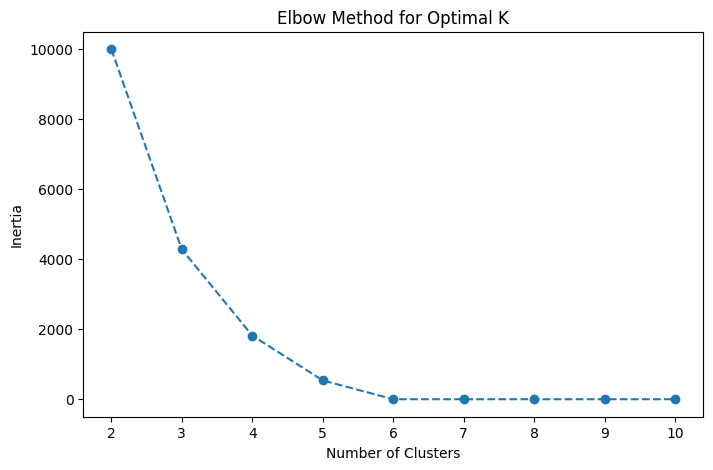

Silhouette Score: 0.81


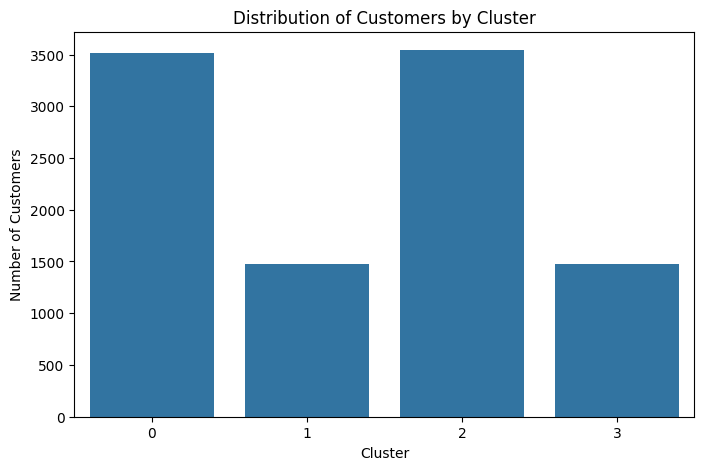

Churn Rates by Cluster:
Cluster
0    0.243451
1    0.163834
2    0.160644
3    0.252374
Name: Exited, dtype: float64


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#  Normalize the data to ensure fair clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Geography', 'HasCrCard']])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

#  Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)  # Testing cluster numbers from 2 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the best K value
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Set the optimal number of clusters based on the elbow point
k_optimal = 4  # You can adjust this based on the elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
pca_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Compute the Silhouette Score to measure clustering quality
silhouette_avg = silhouette_score(X_scaled, pca_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize the distribution of customers across clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=pca_df['Cluster'])
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers by Cluster")
plt.show()

#  Analyze the churn rate for each cluster
pca_df['Exited'] = data['Exited']
churn_rates = pca_df.groupby("Cluster")["Exited"].mean()
print("Churn Rates by Cluster:")
print(churn_rates)


Splitting Data into Training and Testing Sets using train_test_split.

In [29]:
from sklearn.model_selection import train_test_split


X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


Feature Importance Evaluation using Decision Tree Classifier.

In [30]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
})

dt_feature_importance = dt_feature_importance.sort_values(by='Importance', ascending=False)

dt_feature_importance


,Feature,Importance
3,Age,0.223070
5,Balance,0.152792
9,EstimatedSalary,0.147689
0,CreditScore,0.145615
6,NumOfProducts,0.119858
4,Tenure,0.068810
8,IsActiveMember,0.067961
1,Geography,0.037276
2,Gender,0.020122
7,HasCrCard,0.016806


Feature Importance Evaluation using Random Forest Classifier.

In [31]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

rf_feature_importance


,Feature,Importance
3,Age,0.240372
9,EstimatedSalary,0.148316
0,CreditScore,0.142187
5,Balance,0.139119
6,NumOfProducts,0.132305
4,Tenure,0.080338
8,IsActiveMember,0.042086
1,Geography,0.037488
2,Gender,0.019191
7,HasCrCard,0.018598


Feature Importance Evaluation using Logistic Regression.

In [32]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
logreg_model = LogisticRegression(random_state=42, max_iter=200)
logreg_model.fit(X_train, y_train)
logreg_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(logreg_model.coef_[0])
})

logreg_feature_importance = logreg_feature_importance.sort_values(by='Importance', ascending=False)

logreg_feature_importance


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Importance
8,IsActiveMember,9.815628e-01
2,Gender,6.399378e-01
6,NumOfProducts,4.152892e-01
7,HasCrCard,1.673270e-01
1,Geography,9.761032e-02
3,Age,5.863919e-02
4,Tenure,3.360742e-02
0,CreditScore,3.195330e-03
5,Balance,3.099929e-06
9,EstimatedSalary,7.611258e-07


Model Comparison and Hyperparameter Tuning for Random Forest, Decision Tree, and Logistic Regression.


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ----------------------- 1. Random Forest -----------------------
# Previously extracted important features for Random Forest
important_features_rf = ['Age','EstimatedSalary','CreditScore']

# Select the relevant columns from X_train
X_train_rf = X_train[important_features_rf]

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train)

# Setup GridSearchCV for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_rf, y_train)

# Display the best hyperparameters and model accuracy
print("Best Hyperparameters from GridSearchCV (Random Forest):")
print(grid_search_rf.best_params_)
print("Best Model Accuracy (Random Forest):", grid_search_rf.best_score_)

# Test the model on X_test
X_test_rf = X_test[important_features_rf]
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_rf)

# Calculate and display metrics
print("\nRandom Forest - Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# ----------------------- 2. Decision Tree -----------------------
# Previously extracted important features for Decision Tree
important_features_dt = ['Balance',  'Age','EstimatedSalary']

# Select the relevant columns from X_train
X_train_dt = X_train[important_features_dt]

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train)

# Setup GridSearchCV for hyperparameter tuning
param_grid_dt = {
    'max_depth': [10, 20, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train_dt, y_train)

# Display the best hyperparameters and model accuracy
print("Best Hyperparameters from GridSearchCV (Decision Tree):")
print(grid_search_dt.best_params_)
print("Best Model Accuracy (Decision Tree):", grid_search_dt.best_score_)

# Test the model on X_test
X_test_dt = X_test[important_features_dt]
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_dt)

# Calculate and display metrics
print("\nDecision Tree - Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

print("F1-Score:", f1_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# ----------------------- 3. Logistic Regression -----------------------
# Previously extracted important features for Logistic Regression
important_features_lr = ['IsActiveMember','Gender']

# Select the relevant columns from X_train
X_train_lr = X_train[important_features_lr]

# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_lr, y_train)

# Setup GridSearchCV for hyperparameter tuning
param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'max_iter': [100, 200, 300],  # Max number of iterations
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train_lr, y_train)

# Display the best hyperparameters and model accuracy
print("Best Hyperparameters from GridSearchCV (Logistic Regression):")
print(grid_search_lr.best_params_)
print("Best Model Accuracy (Logistic Regression):", grid_search_lr.best_score_)

# Test the model on X_test
X_test_lr = X_test[important_features_lr]
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test_lr)

# Calculate and display metrics
print("\nLogistic Regression - Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Best Hyperparameters from GridSearchCV (Random Forest):
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy (Random Forest): 0.8019999999999999

Random Forest - Evaluation Metrics:
Accuracy: 0.8045
Precision: 0.5063291139240507
Recall: 0.2035623409669211
F1-Score: 0.29038112522686027

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1607
           1       0.51      0.20      0.29       393

    accuracy                           0.80      2000
   macro avg       0.67      0.58      0.59      2000
weighted avg       0.77      0.80      0.77      2000

Best Hyperparameters from GridSearchCV (Decision Tree):
{'max_depth': 10, 'min_samples_split': 10}
Best Model Accuracy (Decision Tree): 0.782625

Decision Tree - Evaluation Metrics:
Accuracy: 0.7855
Precision: 0.4217391304347826
Recall: 0.24681933842239187
F1-Score: 0.3113964686998395

Classification Report (Decisio

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Comparison of Machine Learning Models Performance (Accuracy).

ML Models Performance:
                      Model  Accuracy
0  Decision Tree Classifier     78.55
1       Logistic Regression     80.35
2  Random Forest Classifier     80.25


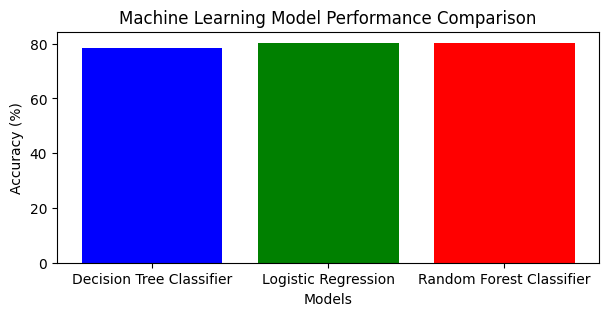

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


models = ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier']
accuracy = [78.55, 80.35, 80.25]


df_accuracy = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

print("ML Models Performance:")
print(df_accuracy)

#
plt.figure(figsize=(7,3))
plt.bar(models, accuracy, color=['blue', 'green', 'red'])
plt.title('Machine Learning Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.show()


Confusion Matrix Visualization for Random Forest Model.

In [35]:
from sklearn.metrics import confusion_matrix


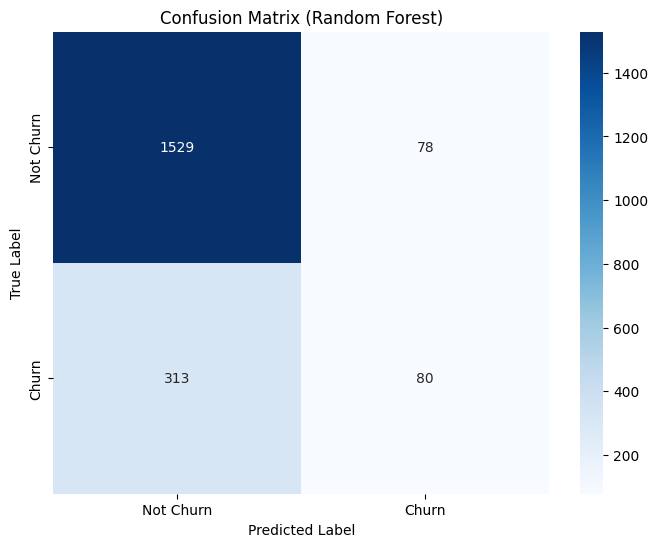

In [36]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Confusion Matrix Visualization for Decision Tree Model.

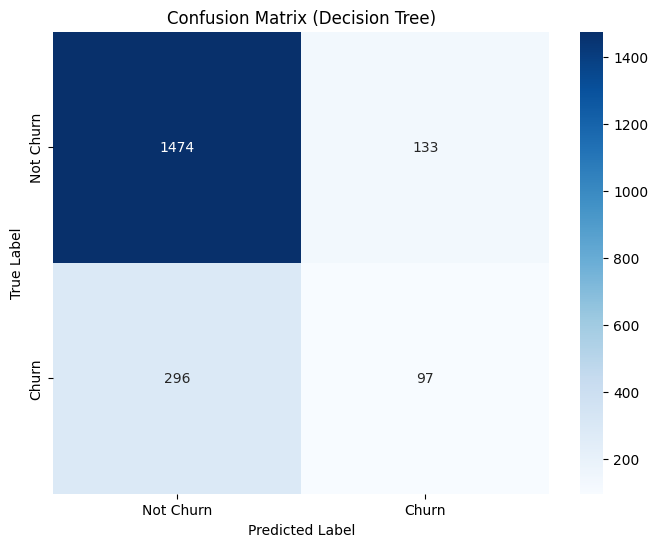

In [37]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Confusion Matrix Visualization for Logistic Regression Model.

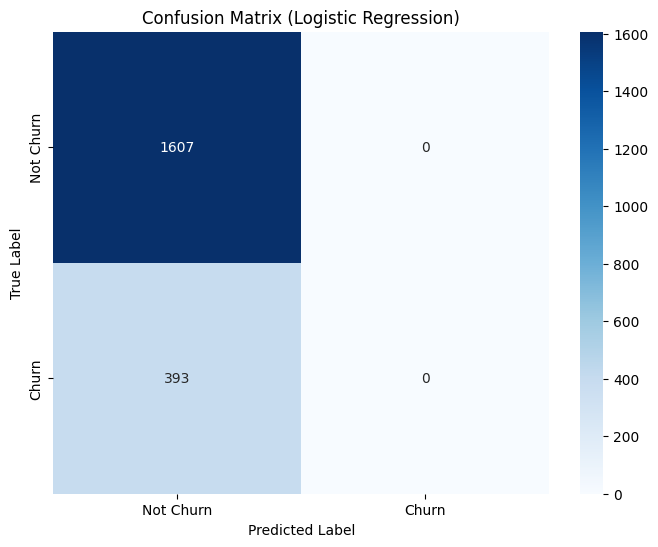

In [38]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
